In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [11]:
df_data = pd.read_csv('/Users/sharcapri/venv_b4tm/Train_call.csv')
df_labels = pd.read_csv("/Users/sharcapri/venv_b4tm/Train_clinical.csv")
df_data = pd.DataFrame(df_data)
df_labels = pd.DataFrame(df_labels)

In [12]:
trans = df_data.transpose()
print(trans)

            0      1       2       3       4       5        6        7     \
V1    Chromosome      1       1       1       1       1        1        1   
V2         Start   2927   85022  370546  471671  792533   912799  1271190   
V3           End  43870  216735  372295  786483  907406  1266212  1590570   
V4        Nclone      3       4       4       5      13       96       45   
V5     Array.129      0       0       0       0       0        0        0   
...          ...    ...     ...     ...     ...     ...      ...      ...   
V100    Array.10      0       0       0       0       0        0        0   
V101   Array.123      0       0       0       0       0        0        0   
V102   Array.100      0       0       0       0       0        0        0   
V103   Array.134     -1      -1      -1      -1      -1       -1       -1   
V104   Array.130      0       0       0       0       0        0        0   

         8        9     ...       2825       2826       2827       2828  \


In [13]:
trans = trans.rename(columns={trans.columns[0]: "Sample"})
print(trans)

          Sample      1       2       3       4       5        6        7  \
V1    Chromosome      1       1       1       1       1        1        1   
V2         Start   2927   85022  370546  471671  792533   912799  1271190   
V3           End  43870  216735  372295  786483  907406  1266212  1590570   
V4        Nclone      3       4       4       5      13       96       45   
V5     Array.129      0       0       0       0       0        0        0   
...          ...    ...     ...     ...     ...     ...      ...      ...   
V100    Array.10      0       0       0       0       0        0        0   
V101   Array.123      0       0       0       0       0        0        0   
V102   Array.100      0       0       0       0       0        0        0   
V103   Array.134     -1      -1      -1      -1      -1       -1       -1   
V104   Array.130      0       0       0       0       0        0        0   

            8        9  ...       2825       2826       2827       2828  \


In [14]:
trans= trans.drop(trans.index[0:4])
print(trans)

         Sample   1   2   3   4   5   6   7   8   9  ... 2825 2826 2827 2828  \
V5    Array.129   0   0   0   0   0   0   0   0   0  ...    2    2    2    2   
V6     Array.34   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V7     Array.67   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V8     Array.24   0   0   0   0   0   0   0  -1   0  ...    0    0    0    0   
V9     Array.22   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
V100   Array.10   0   0   0   0   0   0   0   0   0  ...    1    1    0    1   
V101  Array.123   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V102  Array.100   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V103  Array.134  -1  -1  -1  -1  -1  -1  -1  -1  -1  ...    1    1    1    1   
V104  Array.130   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   

     2829 2830 2831 2832 2833 2834  
V5

In [15]:
numeric_columns = trans.columns.difference(['Sample'])
trans[numeric_columns] = trans[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(trans)

         Sample  1  2  3  4  5  6  7  8  9  ...  2825  2826  2827  2828  2829  \
V5    Array.129  0  0  0  0  0  0  0  0  0  ...     2     2     2     2     0   
V6     Array.34  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V7     Array.67  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V8     Array.24  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0   
V9     Array.22  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
...         ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
V100   Array.10  0  0  0  0  0  0  0  0  0  ...     1     1     0     1     1   
V101  Array.123  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V102  Array.100  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V103  Array.134 -1 -1 -1 -1 -1 -1 -1 -1 -1  ...     1     1     1     1     1   
V104  Array.130  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   

      2830  2831  2832  283

In [16]:
merged_df = pd.merge(trans, df_labels, on='Sample')
print(merged_df)

       Sample  1  2  3  4  5  6  7  8  9  ...  2826  2827  2828  2829  2830  \
0   Array.129  0  0  0  0  0  0  0  0  0  ...     2     2     2     0     1   
1    Array.34  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
2    Array.67  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
3    Array.24  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0   
4    Array.22  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
..        ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
95   Array.10  0  0  0  0  0  0  0  0  0  ...     1     0     1     1     1   
96  Array.123  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
97  Array.100  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
98  Array.134 -1 -1 -1 -1 -1 -1 -1 -1 -1  ...     1     1     1     1     1   
99  Array.130  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   

    2831  2832  2833  2834    Subgroup  
0      1  

In [27]:
X = merged_df.drop(['Sample', 'Subgroup'], axis=1)
y = merged_df['Subgroup']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
2184    2185    0.484863
74        75    0.143644
1910    1911    0.113491
2755    2756    0.092760
1997    1998    0.065578
...      ...         ...
947      948    0.000000
948      949    0.000000
949      950    0.000000
950      951    0.000000
2833    2834    0.000000

[2834 rows x 2 columns]


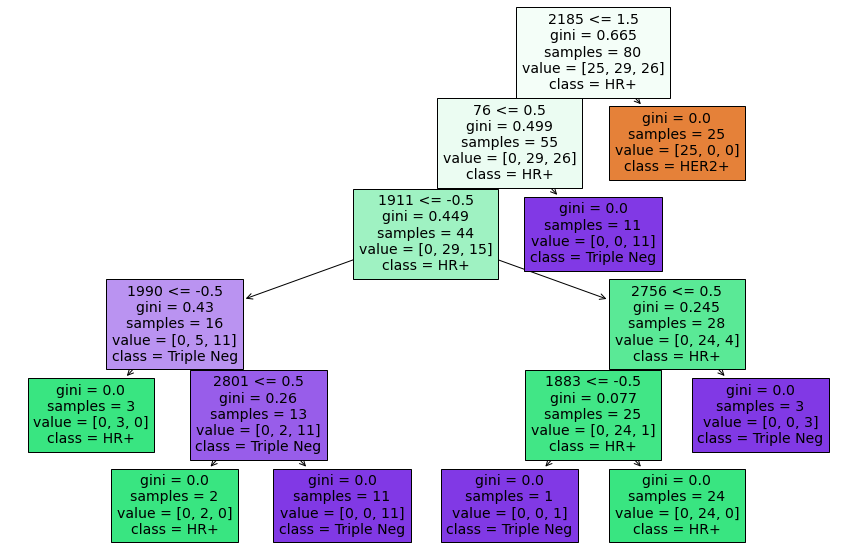

In [18]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6 0 1]
 [0 6 1]
 [0 3 3]]


In [21]:
class_labels = ['HER2+', 'HR+', 'Triple Neg']


confusion_data = {'HER2+': [6, 0, 1],
                  'HR+': [0, 6, 1],
                  'Triple Neg': [0, 3, 3]}

# 
confusion_df = pd.DataFrame(confusion_data, index=class_labels)

# Calculate class error
confusion_df['class.error'] = 1 - confusion_df.apply(lambda row: row[row.name] / row.sum(), axis=1)

# Display the confusion matrix
print("Confusion matrix:")
print(confusion_df)



Confusion matrix:
            HER2+  HR+  Triple Neg  class.error
HER2+           6    0           0     0.000000
HR+             0    6           3     0.333333
Triple Neg      1    1           3     0.400000


In [28]:

X = merged_df.drop(['Sample', 'Subgroup'], axis=1)
y = merged_df['Subgroup']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

outer_scores = []
for train_index, test_index in outer_cv.split(X, y):
    print("Outer Train Index:", train_index)
    print("Outer Test Index:", test_index)
    X_train_outer, X_test_outer = X[train_index], X[test_index]
    y_train_outer, y_test_outer = y[train_index], y[test_index]
    
    inner_scores = []
    for inner_train_index, inner_test_index in inner_cv.split(X_train_outer, y_train_outer):
        print("Inner Train Index:", inner_train_index)
        print("Inner Test Index:", inner_test_index)
        X_train_inner, X_test_inner = X_train_outer[inner_train_index], X_test_outer[inner_test_index]
        y_train_inner, y_test_inner = y_train_outer[inner_train_index], y_test_outer[inner_test_index]
        
        # Fit the model on the inner training set
        rf_classifier.fit(X_train_inner, y_train_inner)
        
        # Evaluate the model on the inner test set
        inner_score = rf_classifier.score(X_test_inner, y_test_inner)
        inner_scores.append(inner_score)
    
    # Calculate and store the mean of inner CV scores
    outer_scores.append(sum(inner_scores) / len(inner_scores))

# Calculate and print the mean of outer CV scores
print("Mean Accuracy:", sum(outer_scores) / len(outer_scores))

Outer Train Index: [ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 27 28
 29 30 32 33 35 36 38 39 40 41 42 43 44 45 46 48 51 52 53 55 56 58 59 60
 61 62 63 64 65 66 67 68 70 71 72 73 74 75 76 77 78 79 80 81 84 85 86 87
 89 90 92 94 95 96 97 98]
Outer Test Index: [ 4  8 19 25 26 31 34 37 47 49 50 54 57 69 82 83 88 91 93 99]


KeyError: '[0] not in index'